# Introduction to OpenCV - Exercises
## Computer Vision and Image Processing - Lab Session 2
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it, Alex Costanzino, alex.costanzino@studio.unibo.it

## Exercise 1: Invert Grayscale Image

####  Compute the *“negative”* of a  grayscale image (range of each pixel between [0 255]).  For each pixel having intensity I, modify its the value: 255 - I. Download *"grayscale.jpg"* and test the program on it.

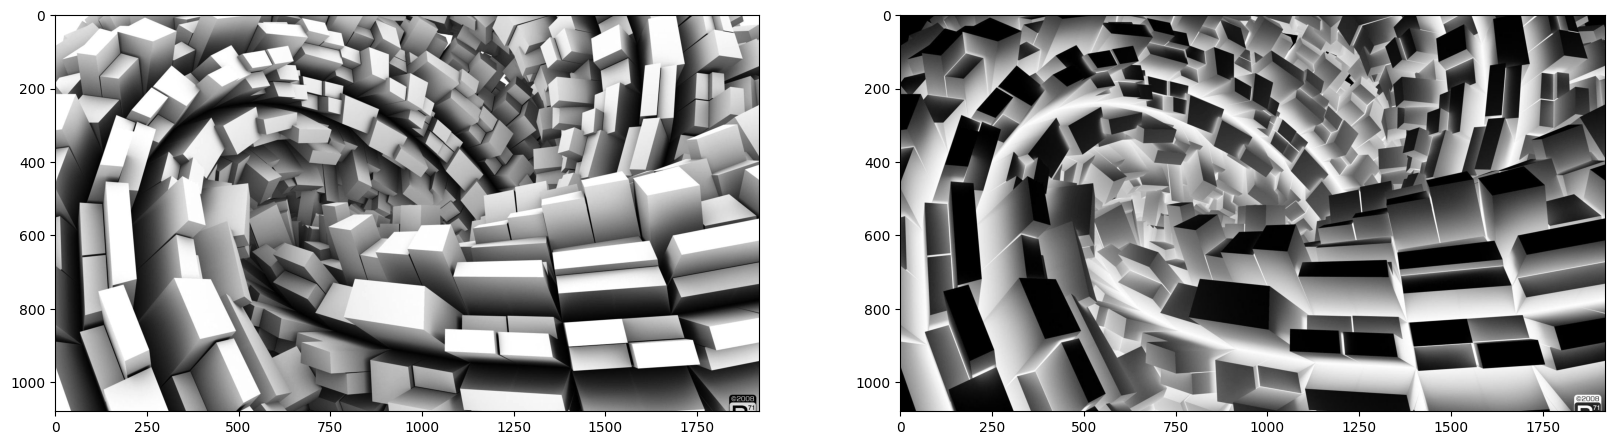

In [3]:
%matplotlib inline
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image
img_gray = cv2.imread('grayscale.jpg', cv2.IMREAD_GRAYSCALE)

# Invert image
res = np.subtract(255, img_gray)

# Display Image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(1, 2, 2)
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.show()


## Exercise 2: Invert RGB Image

#### Same as before, but in this case we want to compute the negative of a color image. The image has 3 channels, representing the 3 RGB values, the intensity of each channel ranges between [0 255]. For each image pixel, we need to substitute the (B,G,R) triplet with its «inverse» *(255-B, 255-G, 255-R)*.  Download *"avengers.png"*and test the program on it.

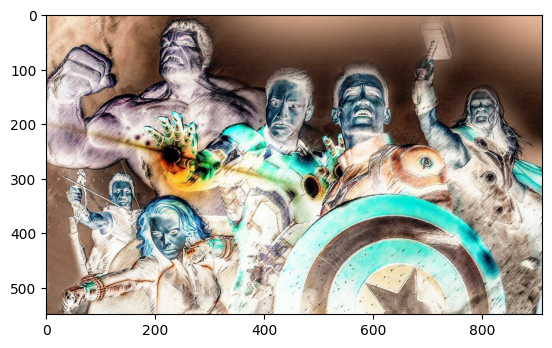

In [1]:
%matplotlib inline
# Write here your solution
# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read image
img = cv2.imread('avengers.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Invert image
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

R_inv = np.subtract(255, R)
G_inv = np.subtract(255, G)
B_inv = np.subtract(255, B)

inverted = np.stack([R_inv, G_inv, B_inv], axis=-1)

# Display Image
plt.imshow(inverted)
plt.show()

## Exercise 3: Differences between Images

#### 1: Compute the pixel-wise difference between two pictures : Image1 and Image2. Compute an output image where each pixel of coordinates (x,y) contains the absolute difference of the corresponding pixels on Image1 and Image2: Out(x,y) = abs(Image1(x,y) – Image2(x,y)). 
#### 2: Find all pixels with a mean difference (across R,G,B channels) higher than 0 and create a copy of Image1 obscuring (with value 0) those pixels. Display that image.
#### 3: Save the new image on disk and check the result. 
#### Test the exercise on Image 1:*"differences1.png"* and Image 2: *"differences2.png"*.

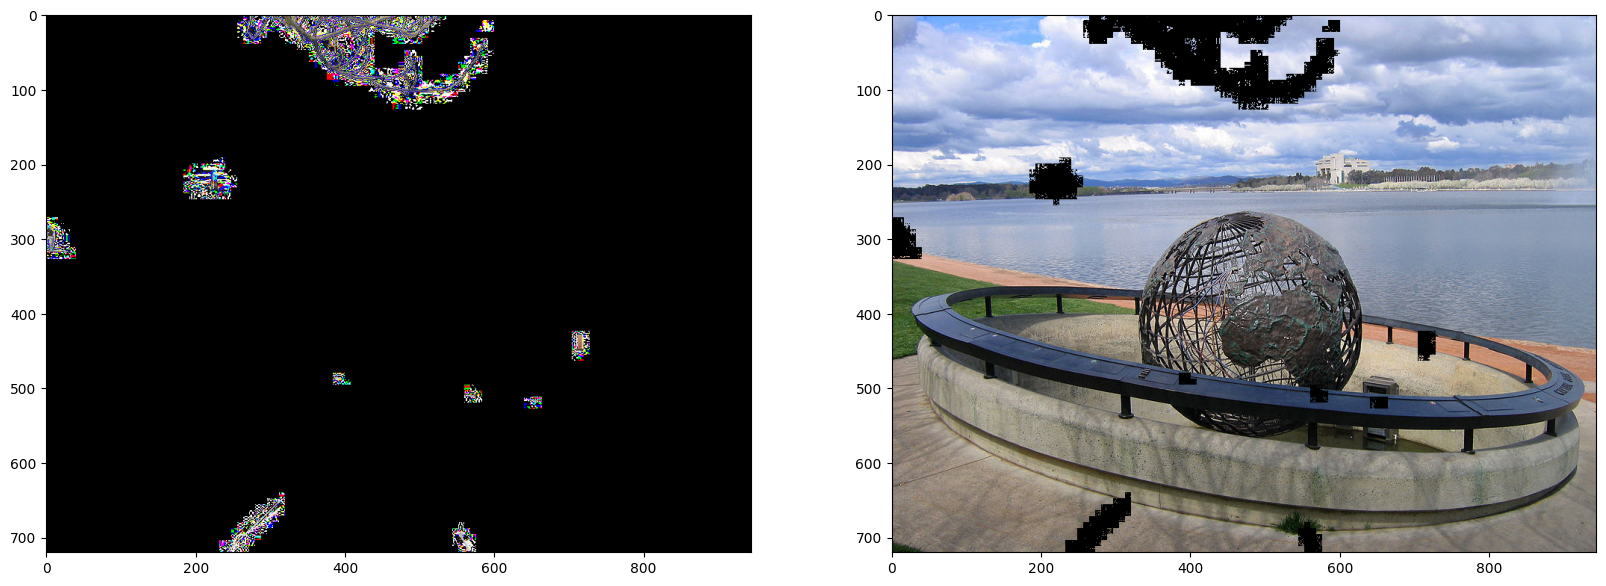

In [15]:
%matplotlib inline
# Write here your solution
# Import libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read images
img1 = cv2.imread('Differences/differences1.png')
img2 = cv2.imread('Differences/differences2.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Perform Difference
difference = np.abs(np.subtract(img1, img2))
mean_diff = np.mean(difference, axis=-1)
copy1 = img1.copy()
copy1[mean_diff > 0] = 0

cv2.imwrite('Differences/mean-difference.png', cv2.cvtColor(copy1, cv2.COLOR_RGB2BGR))

# Display Image
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(difference)
plt.subplot(1, 2, 2)
plt.imshow(copy1)
plt.show()

In [ ]:
# Compute mean difference along last axis and mask image based on threshold

# Display Image


In [ ]:
# Save image on disk


## Exercise 4 [OPTIONAL]: Classify 7-Segments Display Digits

#### Classify a digits of the 7-segment display. 

<img src="7segments.png" width="128" height="256">

#### In a 7-segment display each segment can be ON or OFF. In a binary image we identify 255 (white) as ON and 0 (black) as OFF. The order of the 7-segments is depicted in the image above. To understand the image location of the segments refer to sample images (1.png, ..., 9.png).

#### The combination of ON and OFF segments allows the display to show all possible digits from 0 to 9. A segment is defined ON if there are only white pixels (255) in that portion of an image. In test images each segment have a width of 20 pixels and an height of 128 pixels. Given a 256x128 digit image classify the correct number.

#### It is enough that the algorithm works on example images (a general solution is not required).

#### Test the program on digits images (1.png,  ..., 9.png). 

#### Tips (Only if you need help): 
* Identify the correct location (rows, columns range) for each segment based on example images (1.png, 2.png, etc). 
* Understand which segment is ON and OFF and save the status of each segment.
* Based on which segment is active look for the right digit.


Test Done: all digits are correct!
4


<function matplotlib.pyplot.show(close=None, block=None)>

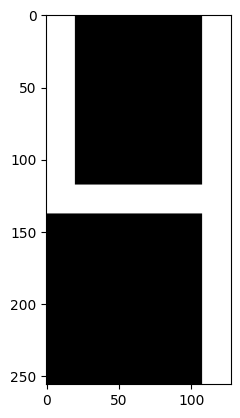

In [42]:
%matplotlib inline
# Write here your solution
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
import cv2

# Dictionary of ON segments for each possible digit.
# The order follows the scheme of the image above.
# For instance, digit 1 have only the segments 2 and 5 ON (1) while the others OFF (0).
SEGMENTS_DIGITS = {
    (1, 1, 1, 0, 1, 1, 1): 0,
    (0, 0, 1, 0, 0, 1, 0): 1,
    (1, 0, 1, 1, 1, 0, 1): 2,
    (1, 0, 1, 1, 0, 1, 1): 3,
    (0, 1, 1, 1, 0, 1, 0): 4,
    (1, 1, 0, 1, 0, 1, 1): 5,
    (1, 1, 0, 1, 1, 1, 1): 6,
    (1, 0, 1, 0, 0, 1, 0): 7,
    (1, 1, 1, 1, 1, 1, 1): 8,
    (1, 1, 1, 1, 0, 1, 1): 9
}

# List to track active elements
active_segments = [0,0,0,0,0,0,0]
notable_pixels = []

notable_pixels.append([0, 21])       # 0
notable_pixels.append([21, 0])      # 1
notable_pixels.append([21, 127])    # 2
notable_pixels.append([128, 21])    # 3
notable_pixels.append([139, 0])     # 4
notable_pixels.append([139, 127])   # 5
notable_pixels.append([255, 21])    # 6

# Find active elements
def find_active_elements(image):
    for i in range(7):
        active_segments[i] = check_element(i, image)

    return SEGMENTS_DIGITS[tuple(active_segments)]

def check_element(i, image):
    if image[notable_pixels[i][0], notable_pixels[i][1]] == 255:
        return 1
    else:
        return 0

def test_all_numbers():
    for i in range(10):
        img = cv2.imread('Digits/' + str(i) + '.png', cv2.IMREAD_GRAYSCALE)
        if find_active_elements(img) != i:
            print('Error... ', i)
    print("\nTest Done: all digits are correct!")

# Results
test_all_numbers()

i = cv2.imread('Digits/4.png', cv2.IMREAD_GRAYSCALE)

print(find_active_elements(i))

plt.imshow(i, cmap='gray', vmin=0, vmax=255)
plt.show